# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

**We would need to dummify Species, Island, Sex, and Year if we wish but this could be optional.  The other 3 variables are clearly categories which need to be transformed into dummy variables like Species_Adelie with a value of 1 or 0.**


In [1]:
# Code Here
from palmerpenguins import load_penguins
from plotnine import *
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *

penguins = load_penguins()
penguins_clean = penguins.dropna()
penguins_clean.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

In [2]:
# Code Here
penguins_clean_copy = penguins_clean.copy()

# Linear Regression 
y = penguins_clean_copy['bill_depth_mm']
X_linear = penguins_clean_copy[['bill_length_mm']]

lr = LinearRegression()

linear_fit = lr.fit(X_linear, y)
y_pred_lr = linear_fit.predict(X_linear)

# Quadratic Model
X_quadratic = X_linear.copy()

X_quadratic["X_sq"] = X_quadratic["bill_length_mm"]**2

quad = LinearRegression()

quad_fit = quad.fit(X_quadratic, y)
y_pred_quad = quad_fit.predict(X_quadratic)


# Cubic Model
X_cubic = X_quadratic.copy()

X_cubic["X_cubed"] = X_cubic["bill_length_mm"]**3

cubic = LinearRegression()

cubic_fit = cubic.fit(X_cubic, y)
y_pred_cubic = cubic_fit.predict(X_cubic)


# Degree 10 Model
X_decic = X_cubic.copy()

X_decic["X_four"] = X_decic["bill_length_mm"]**4
X_decic["X_five"] = X_decic["bill_length_mm"]**5
X_decic["X_six"] = X_decic["bill_length_mm"]**6
X_decic["X_sev"] = X_decic["bill_length_mm"]**7
X_decic["X_eight"] = X_decic["bill_length_mm"]**8
X_decic["X_nine"] = X_decic["bill_length_mm"]**9
X_decic["X_ten"] = X_decic["bill_length_mm"]**10

decic = LinearRegression()

decic_fit = decic.fit(X_decic, y)
y_pred_decic = decic_fit.predict(X_decic)


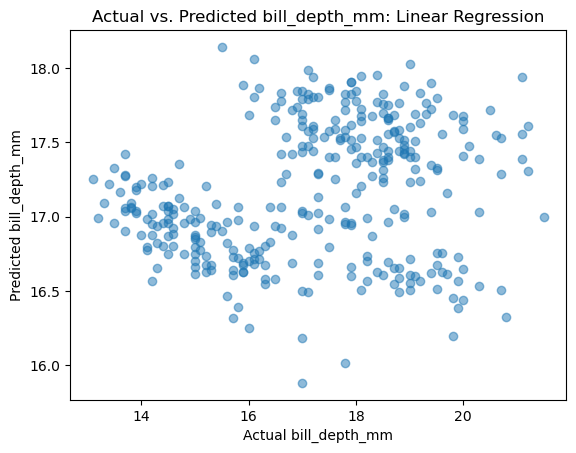

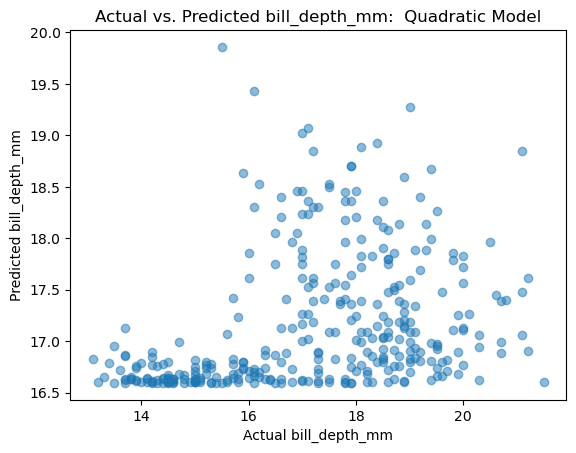

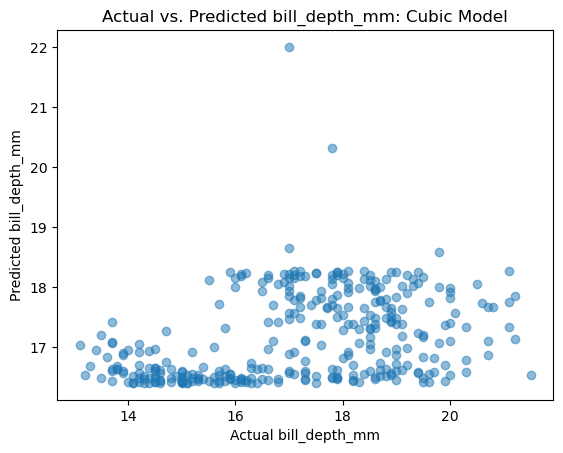

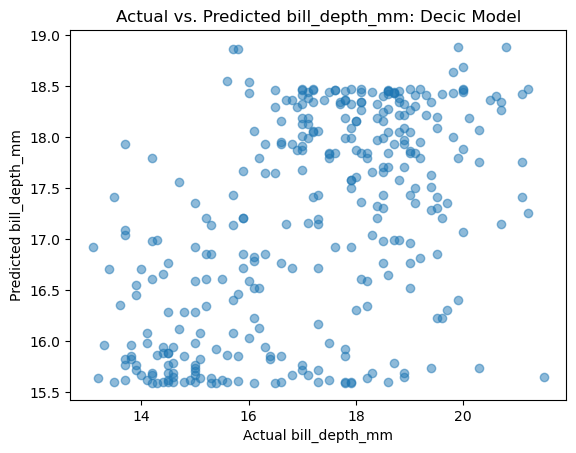

In [3]:
import matplotlib.pyplot as plt

# Linear Regression
plt.scatter(y, y_pred_lr, alpha=0.5)
plt.xlabel('Actual bill_depth_mm')
plt.ylabel('Predicted bill_depth_mm')
plt.title('Actual vs. Predicted bill_depth_mm: Linear Regression')
plt.show()

# Quadratic Model
plt.scatter(y, y_pred_quad, alpha=0.5)
plt.xlabel('Actual bill_depth_mm')
plt.ylabel('Predicted bill_depth_mm')
plt.title('Actual vs. Predicted bill_depth_mm:  Quadratic Model')
plt.show()

# Cubic Model
plt.scatter(y, y_pred_cubic, alpha=0.5)
plt.xlabel('Actual bill_depth_mm')
plt.ylabel('Predicted bill_depth_mm')
plt.title('Actual vs. Predicted bill_depth_mm: Cubic Model')
plt.show()

# Decic Model
plt.scatter(y, y_pred_decic, alpha=0.5)
plt.xlabel('Actual bill_depth_mm')
plt.ylabel('Predicted bill_depth_mm')
plt.title('Actual vs. Predicted bill_depth_mm: Decic Model')
plt.show()

### Model Performance Metrics

In [42]:
print("Linear Model    - ", mean_squared_error(y, y_pred_lr))
print("Quadratic Model - ", mean_squared_error(y, y_pred_quad))
print("Cubic Model     - ", mean_squared_error(y, y_pred_cubic))
print("Decic Model     - ", mean_squared_error(y, y_pred_decic))

Linear Model    -  3.664155709957263
Quadratic Model -  3.442743920135823
Cubic Model     -  3.3364410963455806
Decic Model     -  2.765226841647179


[sorting index with argsort to plot X in order](https://www.sharpsightlabs.com/blog/numpy-argsort/)

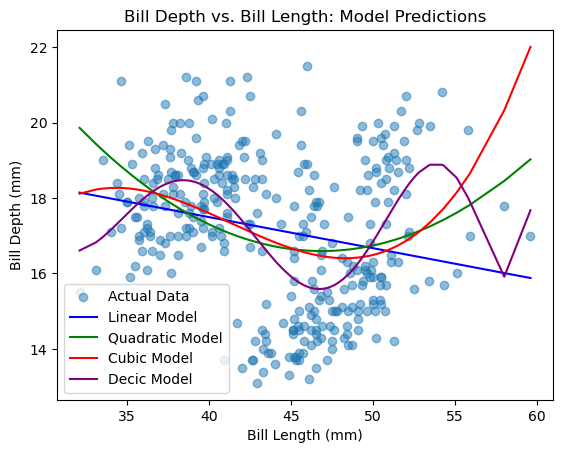

In [58]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(penguins_clean_copy['bill_length_mm'], penguins_clean_copy['bill_depth_mm'], alpha=0.5, label='Actual Data')

# Sort so x's are in order for plot
penguins_clean_sorted = np.argsort(penguins_clean_copy['bill_length_mm'])

plt.plot(penguins_clean_copy['bill_length_mm'].iloc[penguins_clean_sorted], y_pred_lr[penguins_clean_sorted], label='Linear Model', linestyle='-', color='blue')
plt.plot(penguins_clean_copy['bill_length_mm'].iloc[penguins_clean_sorted], y_pred_quad[penguins_clean_sorted], label='Quadratic Model', linestyle='-', color='green')
plt.plot(penguins_clean_copy['bill_length_mm'].iloc[penguins_clean_sorted], y_pred_cubic[penguins_clean_sorted], label='Cubic Model', linestyle='-', color='red')
plt.plot(penguins_clean_copy['bill_length_mm'].iloc[penguins_clean_sorted], y_pred_decic[penguins_clean_sorted], label='Decic Model', linestyle='-', color='purple')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.title('Bill Depth vs. Bill Length: Model Predictions')
plt.legend()
plt.show()


### Are any of the models above underfitting the data? If so, which ones and how can you tell?

- **The linear model likely underfits the data as it is far too simple to assume that only one variable can be used to accurately predict another unless they are confounding.  The bill length could be one factor in this prediction, however more variables are in need.  This is why the SLR has the highest MSE or error.**

### Are any of the models above overfitting the data? If so, which ones and how can you tell?
- **The decic plot overfits due to the overcomplexity of having several predictors.  As shown by our plot of the Actual Data of Bill Length vs Bill Depth, and the different model prediction lines, the decic model clearly captures the quirks of the data which indicates overfitting.**

### Which of the above models do you think fits the data best and why?
- **From the plots of y vs our predictions, the lowest residuals are displayed by the decic model, as it is a good predictor in our case correlating to the lowest MSE, but this is likely due to overfitting.  The SLR model is likely underfitting, so between the cubic and quadratic model, the cubic model seems to perform better due to the lower RMSE of 3.33 < 3.44 (quadratic). So in conclusion, I would argue the cubic model is the best for this data.**